In [ ]:
! pip install transformers==4.28.0
! pip install accelerate
! pip install datasets
! pip install rouge-score nltk
! pip install huggingface_hub
! pip install sentencepiece
! pip install evaluate
! pip install gdown
! pip install git-lfs

#!pip install indoNLP
!pip install Sastrawi
#!pip install spacy
#!pip install spacy-lookups-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=483953fe3dae7c117d41cf612c2128c7b97bd3335e83e3c1ce8f48184e32a0fc
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
     ━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Datasets

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset
dataset = load_dataset("bitext/customer-support-intent-dataset")

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 6539
    })
    validation: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
    test: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
})


In [ ]:
train = dataset["train"].to_pandas()
#validation = dataset["validation"].to_pandas()
#test = dataset["test"].to_pandas()

In [ ]:
train

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
validation

utterance        intent category  \
0          I want help to cancel the order I have made  cancel_order    ORDER   
1    where can I get information about order cancel...  cancel_order    ORDER   
2                        help to cancel the last order  cancel_order    ORDER   
3           I need help with canceling an order I made  cancel_order    ORDER   
4      I do not know how I can cancel the order I made  cancel_order    ORDER   
..                                                 ...           ...      ...   
813                   I try to check the refund status  track_refund   REFUND   
814       I want assistance to check the refund status  track_refund   REFUND   
815  I want assistance checking the status of the r...  track_refund   REFUND   
816                  how can I check my refund status?  track_refund   REFUND   
817                       where do I track the refund?  track_refund   REFUND   

    tags  
0      B  
1    BIM  
2      B  
3      B  
4     BE  
..   ...  
813    B  
814    B  
815    B  
816   BI  
817   BI  

[818 rows x 4 columns]

In [ ]:
test

utterance        intent category  \
0         I have a question about cancelling an order  cancel_order    ORDER   
1                help canceling the order I have made  cancel_order    ORDER   
2    I do not know how to cancel an order I have made  cancel_order    ORDER   
3           where can I cancel the last order I made?  cancel_order    ORDER   
4                  I don't want the last order I made  cancel_order    ORDER   
..                                                ...           ...      ...   
813      I am trying to check the status of my refund  track_refund   REFUND   
814                   help checking the refund status  track_refund   REFUND   
815                will you show me my refund status?  track_refund   REFUND   
816                          help to track the refund  track_refund   REFUND   
817                   I am trying to track the refund  track_refund   REFUND   

    tags  
0      B  
1      B  
2     BE  
3     BI  
4      B  
..   ...  
813    B  
814    B  
815  BIP  
816    B  
817    B  

[818 rows x 4 columns]

## Translate en to id

In [ ]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated

In [ ]:
def trans(sentence):

  try:
    sentence = sentence.lower()
    blob = TextBlob(sentence.strip())
    translation = str(blob.translate(from_lang='en',to='id'))

    return translation

  except NotTranslated:
    return sentence

In [ ]:
train['utterance'] = train['utterance'].apply(lambda x: trans(x))

In [ ]:
validation['utterance'] = validation['utterance'].apply(lambda x: trans(x))

In [ ]:
test['utterance'] = test['utterance'].apply(lambda x: trans(x))

In [ ]:
train

utterance        intent  \
0     Apakah mungkin untuk membatalkan pesanan yang ...  cancel_order   
1                                    pesanan pembatalan  cancel_order   
2     saya perlu bantuan membatalkan pesanan terakhi...  cancel_order   
3     masalah dengan membatalkan pesanan yang saya buat  cancel_order   
4     Saya tidak tahu bagaimana membatalkan pesanan ...  cancel_order   
...                                                 ...           ...   
6534  Saya tidak tahu apa yang harus saya lakukan un...  track_refund   
6535                   Periksa status pengembalian dana  track_refund   
6536      Bantu saya memeriksa status pengembalian dana  track_refund   
6537  Bagaimana cara memeriksa apakah ada pembaruan ...  track_refund   
6538  Bagaimana cara memeriksa apakah ada yang salah...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
validation

utterance        intent category  \
0    Saya ingin bantuan membatalkan pesanan yang te...  cancel_order    ORDER   
1    Di mana saya bisa mendapatkan informasi tentan...  cancel_order    ORDER   
2                membantu membatalkan pesanan terakhir  cancel_order    ORDER   
3    Saya butuh bantuan untuk membatalkan pesanan y...  cancel_order    ORDER   
4    Saya tidak tahu bagaimana saya bisa membatalka...  cancel_order    ORDER   
..                                                 ...           ...      ...   
813    saya mencoba memeriksa status pengembalian dana  track_refund   REFUND   
814  Saya ingin bantuan untuk memeriksa status peng...  track_refund   REFUND   
815  Saya ingin bantuan memeriksa status pengembali...  track_refund   REFUND   
816  Bagaimana cara memeriksa status pengembalian d...  track_refund   REFUND   
817            Di mana saya melacak pengembalian dana?  track_refund   REFUND   

    tags  
0      B  
1    BIM  
2      B  
3      B  
4     BE  
..   ...  
813    B  
814    B  
815    B  
816   BI  
817   BI  

[818 rows x 4 columns]

In [ ]:
test

utterance        intent category  \
0    Saya punya pertanyaan tentang membatalkan pesanan  cancel_order    ORDER   
1    membantu membatalkan pesanan yang telah saya buat  cancel_order    ORDER   
2    Saya tidak tahu bagaimana membatalkan pesanan ...  cancel_order    ORDER   
3    Di mana saya dapat membatalkan pesanan terakhi...  cancel_order    ORDER   
4     Saya tidak ingin pesanan terakhir yang saya buat  cancel_order    ORDER   
..                                                 ...           ...      ...   
813  Saya mencoba memeriksa status pengembalian dan...  track_refund   REFUND   
814        membantu memeriksa status pengembalian dana  track_refund   REFUND   
815  Maukah Anda menunjukkan status pengembalian da...  track_refund   REFUND   
816                 membantu melacak pengembalian dana  track_refund   REFUND   
817             Saya mencoba melacak pengembalian dana  track_refund   REFUND   

    tags  
0      B  
1      B  
2     BE  
3     BI  
4      B  
..   ...  
813    B  
814    B  
815  BIP  
816    B  
817    B  

[818 rows x 4 columns]

## Save new datasets

In [ ]:
train.to_csv('/content/drive/MyDrive/DSC dataset/df_train.csv', index=False)

In [ ]:
validation.to_csv('/content/drive/MyDrive/DSC dataset/df_validation.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/DSC dataset/df_test.csv', index=False)

# EDA

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DSC dataset/df_train_modeling.csv')

In [ ]:
train_df

utterance        intent category  \
0                  mungkin batal pesan saya buat  cancel_order    ORDER   
1                                    pesan batal  cancel_order    ORDER   
2        perlu bantu batal pesan akhir saya buat  cancel_order    ORDER   
3                  masalah batal pesan saya buat  cancel_order    ORDER   
4     tidak tahu bagaimana batal pesan saya buat  cancel_order    ORDER   
...                                          ...           ...      ...   
9875      bisa indikasi saya status kembali dana  track_refund   REFUND   
9876                        deteksi kembali dana  track_refund   REFUND   
9877    usaha periksa ada yang baru kembali dana  track_refund   REFUND   
9878    upaya periksa ada yang baru kembali dana  track_refund   REFUND   
9879     niat periksa ada yang baru kembali dana  track_refund   REFUND   

      length  
0          5  
1          2  
2          7  
3          5  
4          7  
...      ...  
9875       6  
9876       3  
9877       7  
9878       7  
9879       7  

[9880 rows x 4 columns]

In [ ]:
train_df['length'] = train_df.utterance.apply(lambda x: len(x.split()))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9880 entries, 0 to 9879
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  9880 non-null   object
 1   intent     9880 non-null   object
 2   category   9880 non-null   object
 3   length     9880 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 308.9+ KB


In [ ]:
train_df.describe(exclude='object').T

count      mean       std  min  25%  50%  75%   max
length  9880.0  5.369939  1.525996  2.0  4.0  5.0  6.0  11.0

Maksimum dan minimum kata pada data masing-masing 11 kata dan 2 kata

In [ ]:
train_df.utterance[train_df.length==11]

2046    tidak tahu bagaimana bisa periksa berapa cepat...
Name: utterance, dtype: object

In [ ]:
train_df.describe(exclude='number').T

count unique                            top  freq
utterance  9880   9880  mungkin batal pesan saya buat     1
intent     9880     27                 create_account   638
category   9880     11                        ACCOUNT  3055

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
print("Jumlah kategori intent unique: %d \n" % train_df.intent.nunique())
print(train_df.intent.unique())

Jumlah kategori intent unique: 27 

['cancel_order' 'change_order' 'change_shipping_address'
 'check_cancellation_fee' 'check_invoice' 'check_payment_methods'
 'check_refund_policy' 'complaint' 'contact_customer_service'
 'contact_human_agent' 'create_account' 'delete_account'
 'delivery_options' 'delivery_period' 'edit_account' 'get_invoice'
 'get_refund' 'newsletter_subscription' 'payment_issue' 'place_order'
 'recover_password' 'registration_problems' 'review'
 'set_up_shipping_address' 'switch_account' 'track_order' 'track_refund']


In [ ]:
print("Jumlah kategori unique: %d \n" % train_df.category.nunique())
print(train_df.category.unique())

Jumlah kategori unique: 11 

['ORDER' 'SHIPPING_ADDRESS' 'CANCELLATION_FEE' 'INVOICE' 'PAYMENT'
 'REFUND' 'FEEDBACK' 'CONTACT' 'ACCOUNT' 'DELIVERY' 'NEWSLETTER']


In [ ]:
custom_order = train_df.category.value_counts().nlargest(5).index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

[]

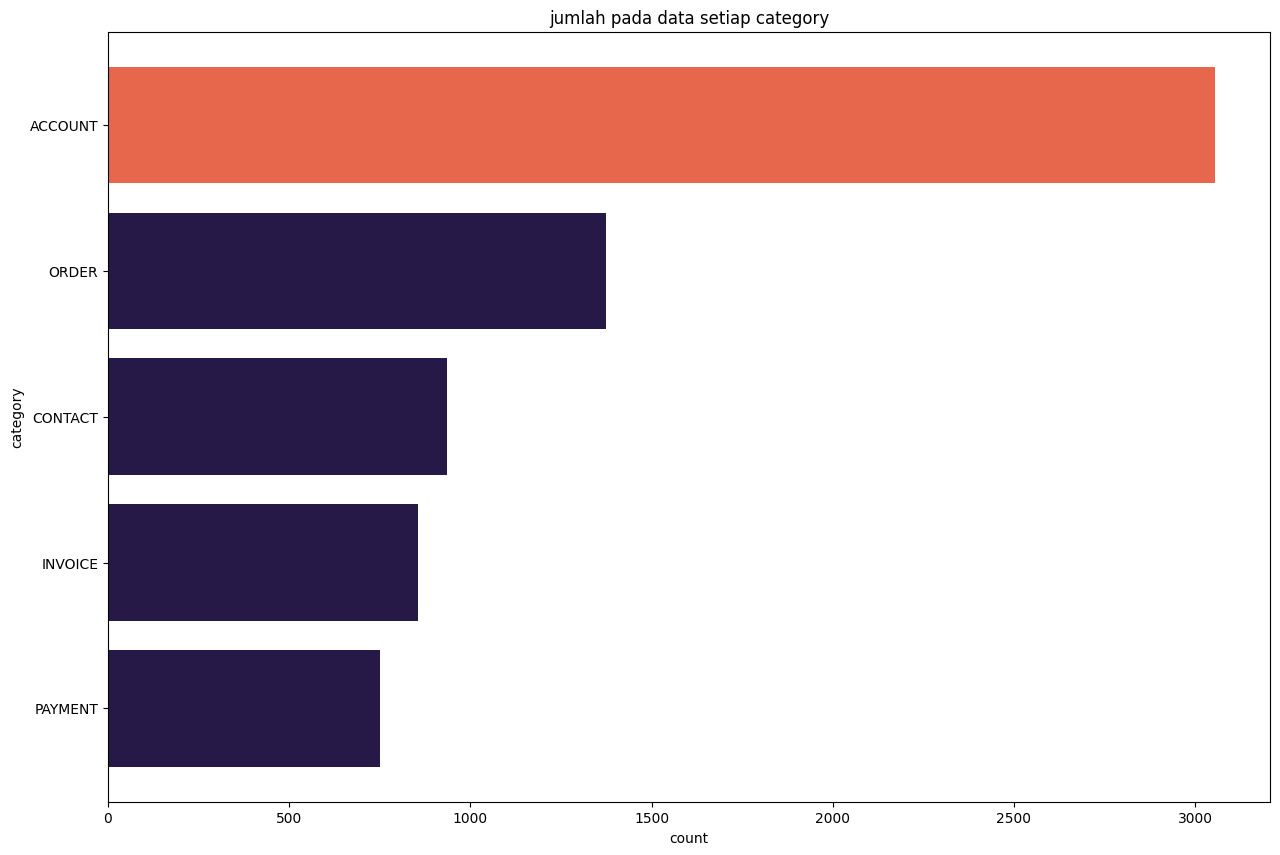

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('jumlah pada data setiap category')
sns.countplot(data=train_df, y='category', order=custom_order, palette=palette)
#plt.xticks(rotation = 45)
plt.plot()

Kebanyakan masalah di kategori Account

In [ ]:
custom_order = train_df.intent[train_df['category']=='ACCOUNT'].value_counts().index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

[]

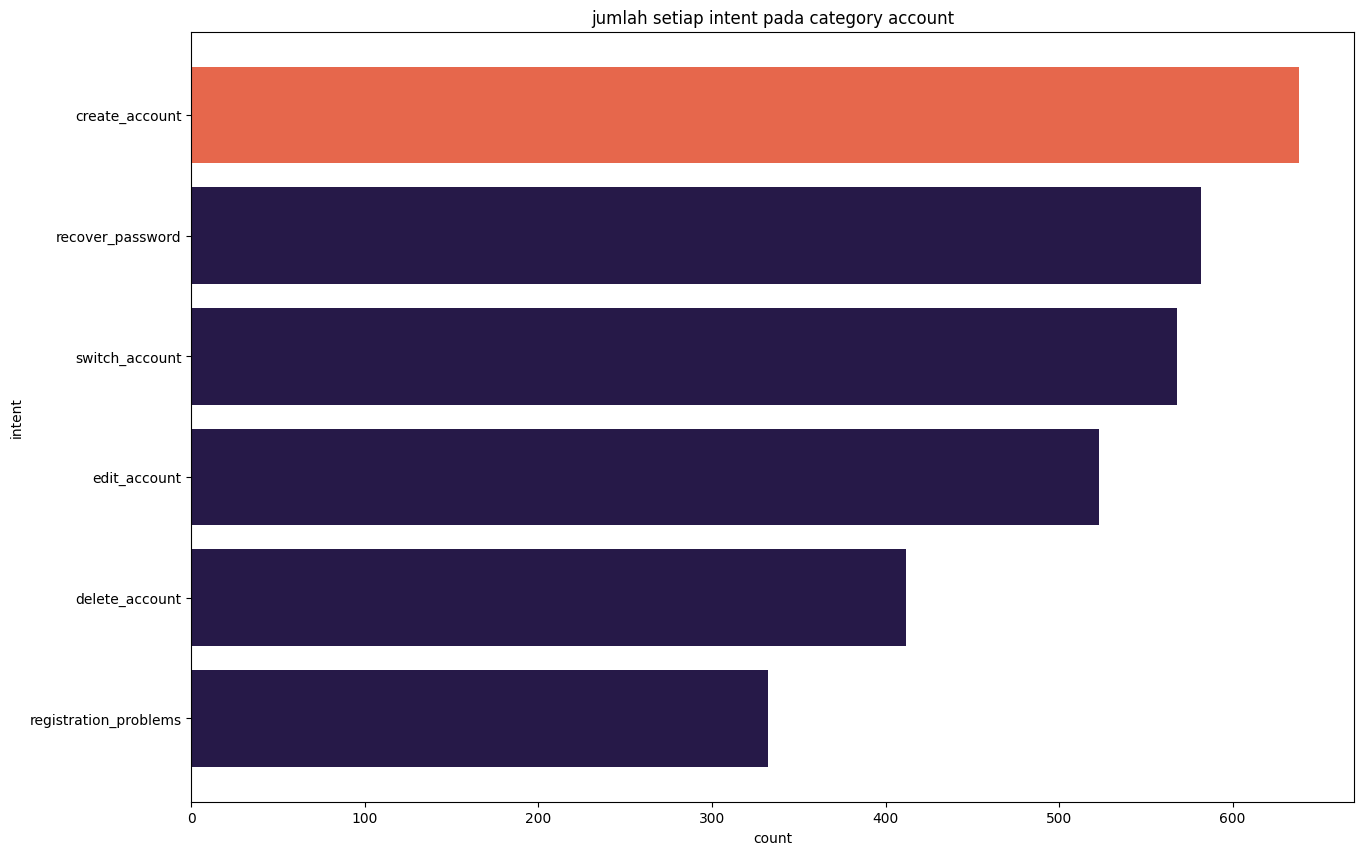

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('jumlah setiap intent pada category account')
sns.countplot(data=train_df, y=train_df.intent[train_df['category']=='ACCOUNT'], order=custom_order, palette=palette)
#plt.xticks(rotation = 45)
plt.plot()

Lebih spesifik pada masalah create account

In [ ]:
custom_order = train_df.intent.value_counts().index

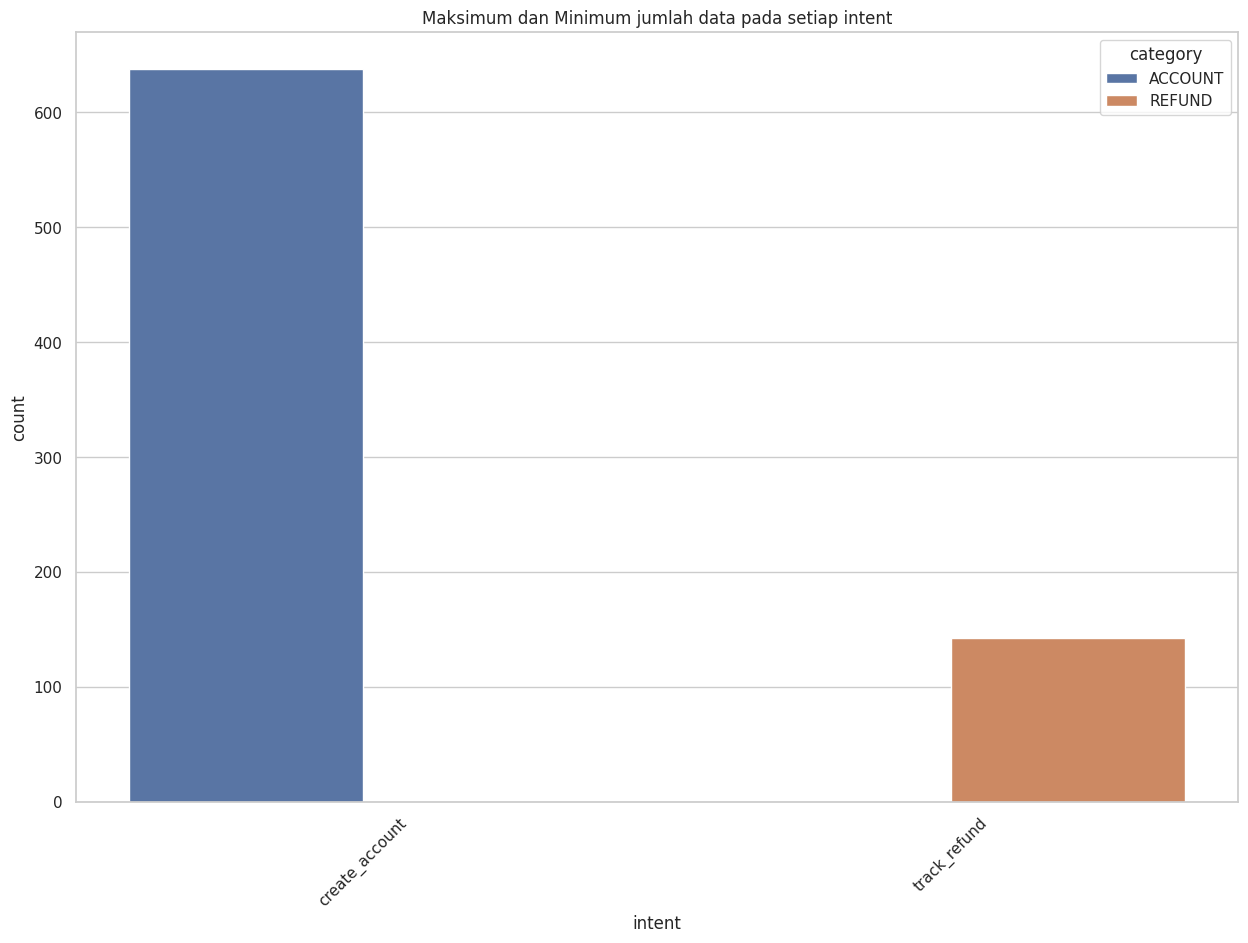

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))
plt.title('Maksimum dan Minimum jumlah data pada setiap intent')
sns.countplot(data=train_df[train_df['intent'].isin([custom_order[0], custom_order[-1]])], x='intent', hue='category', order=[custom_order[0], custom_order[-1]])
plt.xticks(rotation=45)
plt.plot()

sns.reset_orig()

In [ ]:
for i,j in enumerate(train_df.intent.unique()):

  print('{}. INTENT: {} CATEGORY: {} \n'.format(i+1, j, train_df['category'][train_df.intent == j].unique()))

1. INTENT: cancel_order CATEGORY: ['ORDER'] 

2. INTENT: change_order CATEGORY: ['ORDER'] 

3. INTENT: change_shipping_address CATEGORY: ['SHIPPING_ADDRESS'] 

4. INTENT: check_cancellation_fee CATEGORY: ['CANCELLATION_FEE'] 

5. INTENT: check_invoice CATEGORY: ['INVOICE'] 

6. INTENT: check_payment_methods CATEGORY: ['PAYMENT'] 

7. INTENT: check_refund_policy CATEGORY: ['REFUND'] 

8. INTENT: complaint CATEGORY: ['FEEDBACK'] 

9. INTENT: contact_customer_service CATEGORY: ['CONTACT'] 

10. INTENT: contact_human_agent CATEGORY: ['CONTACT'] 

11. INTENT: create_account CATEGORY: ['ACCOUNT'] 

12. INTENT: delete_account CATEGORY: ['ACCOUNT'] 

13. INTENT: delivery_options CATEGORY: ['DELIVERY'] 

14. INTENT: delivery_period CATEGORY: ['DELIVERY'] 

15. INTENT: edit_account CATEGORY: ['ACCOUNT'] 

16. INTENT: get_invoice CATEGORY: ['INVOICE'] 

17. INTENT: get_refund CATEGORY: ['REFUND'] 

18. INTENT: newsletter_subscription CATEGORY: ['NEWSLETTER'] 

19. INTENT: payment_issue CATEGORY: 

In [ ]:
train_df.intent.value_counts()

create_account              638
check_payment_methods       594
recover_password            582
switch_account              568
contact_customer_service    566
edit_account                523
change_order                509
get_invoice                 498
delete_account              412
cancel_order                396
contact_human_agent         371
check_invoice               357
delivery_options            351
complaint                   340
registration_problems       332
newsletter_subscription     327
place_order                 324
change_shipping_address     324
check_cancellation_fee      283
review                      274
check_refund_policy         261
get_refund                  226
delivery_period             202
set_up_shipping_address     177
payment_issue               156
track_order                 146
track_refund                143
Name: intent, dtype: int64

## Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
wordCloud_data = train_df.copy()
wordCloud_data['utterance'] = wordCloud_data['utterance'].apply(lambda x: x.lower())

In [ ]:
def word_cloud(data):

  text = ' '.join([text for text in data])

  # Create stopword list:
  stopwords = set(StopWordRemoverFactory().get_stop_words())

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  text_dictionary = wordcloud.process_text(text)
  # sort the dictionary
  word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

  #use words_ to print relative word frequencies
  rel_freq=wordcloud.words_

  #print results
  print(f'\n')
  print(f'Frekuensi kata paling banyak:')
  print(list(word_freq.items())[:10])
  print(f'\n')
  print(f'Frekuensi kata paling sedikit:')
  print(list(word_freq.items())[-30:-1])

  #for i, j in list(word_freq.items()):

    #if j == 1:
      #print(i)

### ORDER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ORDER'].copy().reset_index(drop=True)

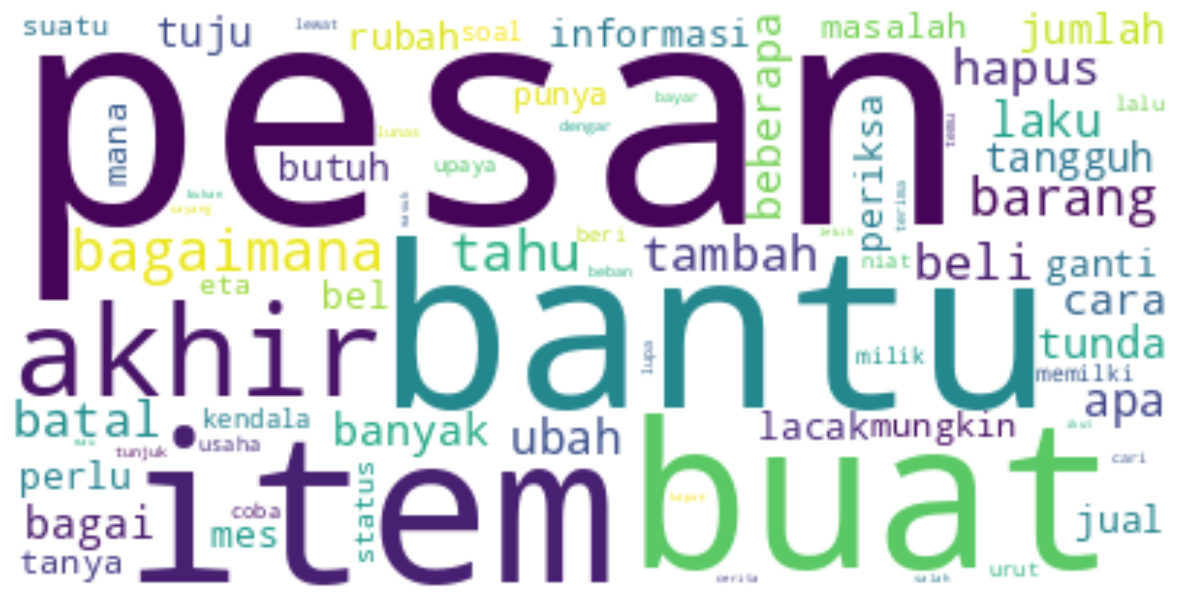



Frekuensi kata paling banyak:
[('pesan', 916), ('bantu', 384), ('item', 322), ('buat', 309), ('akhir', 220), ('bagaimana', 188), ('tahu', 176), ('barang', 150), ('beli', 128), ('hapus', 123)]


Frekuensi kata paling sedikit:
[('cari', 8), ('lewat', 8), ('temu', 7), ('terima', 6), ('bayar', 5), ('lupa', 5), ('tunjuk', 5), ('lunas', 5), ('beban', 5), ('dengar', 5), ('cerita', 4), ('bukan', 4), ('salah', 4), ('sayang', 4), ('ikut', 4), ('lebih', 3), ('mau', 3), ('masuk', 3), ('kapan', 3), ('perintah', 2), ('kumpul', 2), ('jumpa', 2), ('produk', 1), ('trek', 1), ('harap', 1), ('pasu', 1), ('titah', 1), ('instruksi', 1), ('lihat', 1)]


In [ ]:
word_cloud(data)

### SHIPPING ADDRESS

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='SHIPPING_ADDRESS'].copy().reset_index(drop=True)

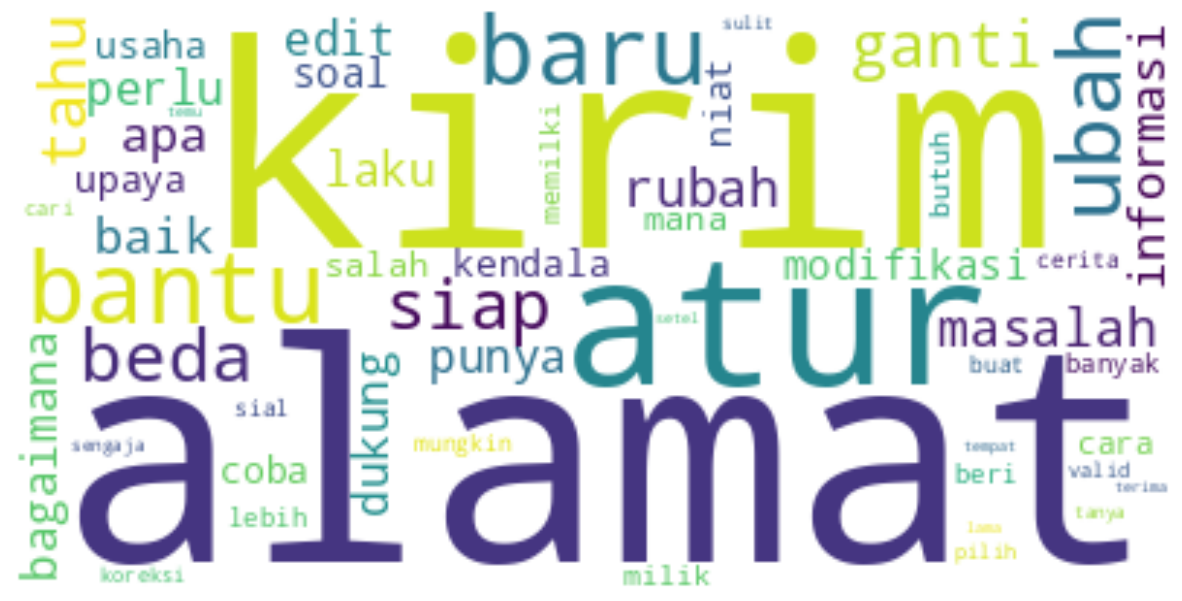



Frekuensi kata paling banyak:
[('alamat', 501), ('kirim', 434), ('atur', 117), ('bantu', 110), ('baru', 104), ('ubah', 82), ('beda', 56), ('siap', 50), ('tahu', 43), ('ganti', 42)]


Frekuensi kata paling sedikit:
[('beri', 11), ('cerita', 9), ('buat', 8), ('sial', 8), ('mungkin', 7), ('koreksi', 5), ('pilih', 5), ('cari', 5), ('valid', 5), ('tanya', 4), ('sengaja', 4), ('sulit', 4), ('tempat', 3), ('lama', 3), ('temu', 3), ('setel', 3), ('terima', 3), ('uhelp', 1), ('gagal', 1), ('uchange', 1), ('koordinasi', 1), ('tetap', 1), ('transformasi', 1), ('lalu', 1), ('laksana', 1), ('sabotase', 1), ('lenyap', 1), ('agal', 1), ('kumpul', 1)]


In [ ]:
word_cloud(data)

### CANCELLATION FEE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CANCELLATION_FEE'].copy().reset_index(drop=True)

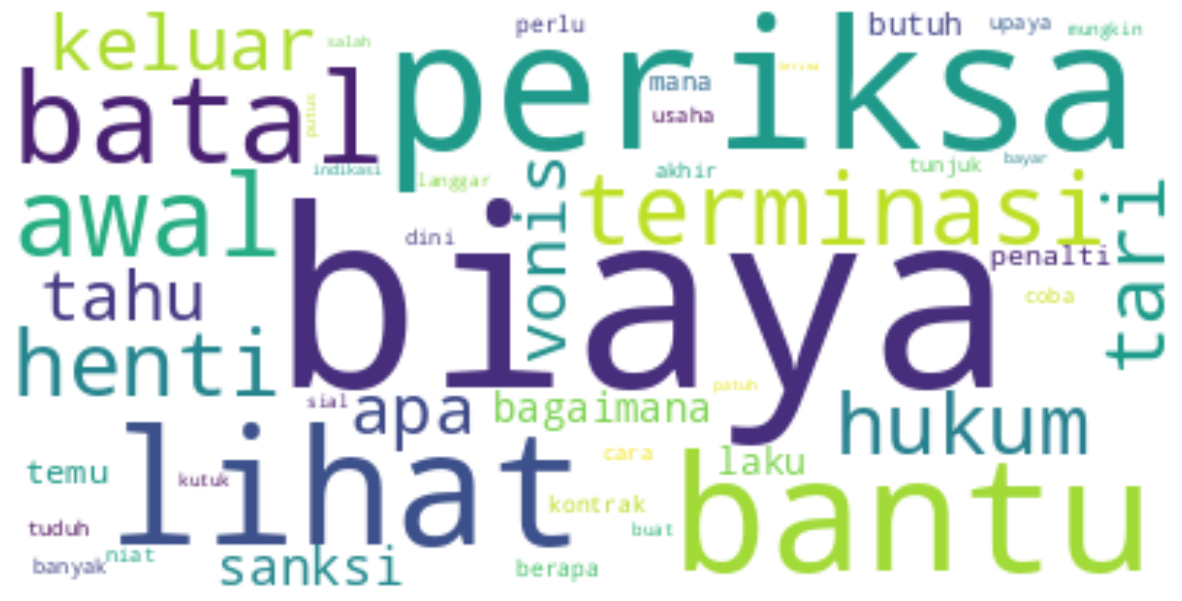



Frekuensi kata paling banyak:
[('biaya', 146), ('periksa', 126), ('lihat', 96), ('bantu', 95), ('batal', 87), ('awal', 70), ('terminasi', 52), ('henti', 43), ('hukum', 38), ('tari', 37)]


Frekuensi kata paling sedikit:
[('tuduh', 8), ('usaha', 8), ('upaya', 8), ('niat', 8), ('langgar', 6), ('mungkin', 6), ('buat', 5), ('kutuk', 5), ('sial', 5), ('putus', 4), ('salah', 4), ('bayar', 4), ('patuh', 4), ('indikasi', 4), ('terima', 3), ('tagih', 2), ('gerogot', 2), ('lunas', 2), ('tuntut', 1), ('mau', 1), ('darah', 1), ('cek', 1), ('patah', 1), ('dengar', 1), ('sayang', 1), ('ikut', 1), ('tunda', 1), ('tangguh', 1), ('tuju', 1)]


In [ ]:
word_cloud(data)

### INVOICE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='INVOICE'].copy().reset_index(drop=True)

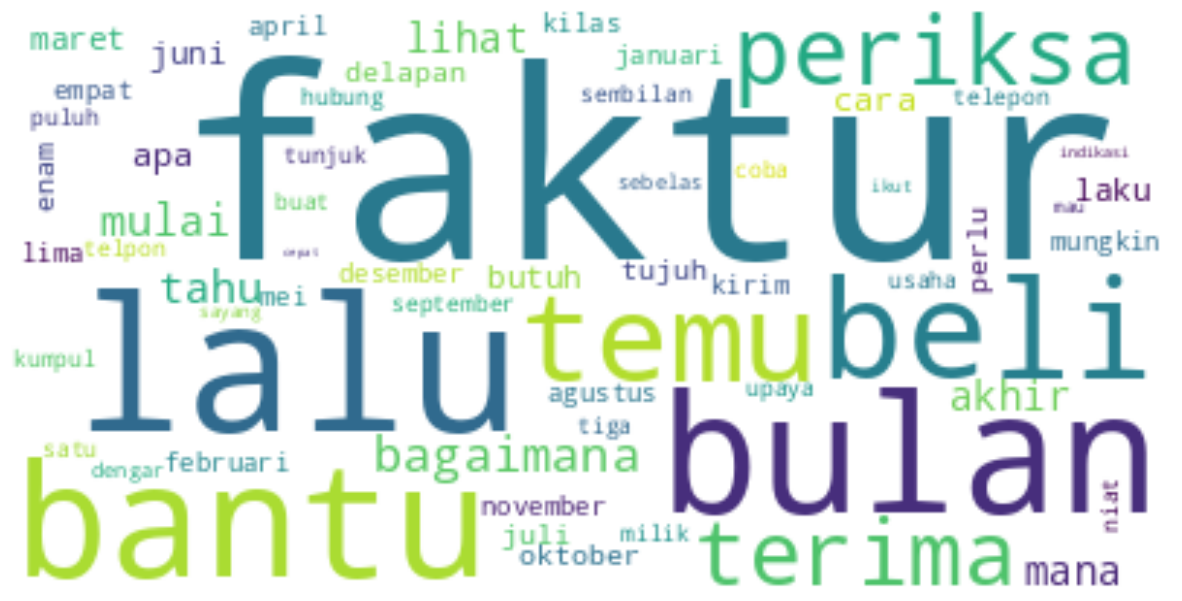



Frekuensi kata paling banyak:
[('faktur', 855), ('lalu', 354), ('bulan', 281), ('bantu', 250), ('beli', 193), ('temu', 150), ('periksa', 145), ('terima', 126), ('bagaimana', 119), ('mulai', 95)]


Frekuensi kata paling sedikit:
[('sembilan', 11), ('buat', 10), ('puluh', 10), ('tiga', 9), ('tunjuk', 9), ('satu', 9), ('coba', 9), ('kumpul', 9), ('usaha', 9), ('upaya', 9), ('niat', 9), ('september', 8), ('milik', 8), ('telepon', 7), ('telpon', 7), ('hubung', 7), ('sebelas', 6), ('dengar', 6), ('mau', 5), ('sayang', 5), ('ikut', 5), ('indikasi', 4), ('cepat', 3), ('sembah', 2), ('sebentar', 1), ('perhati', 1), ('jumpa', 1), ('asumsi', 1), ('menujukkan', 1)]


In [ ]:
word_cloud(data)

### PAYMENT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='PAYMENT'].copy().reset_index(drop=True)

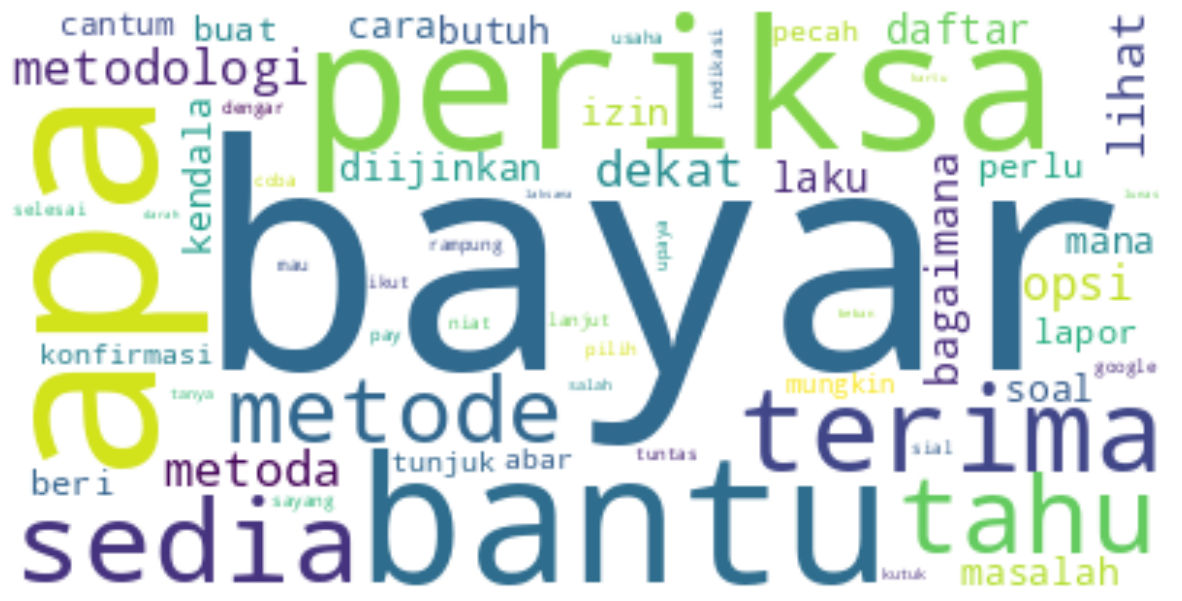



Frekuensi kata paling banyak:
[('bayar', 737), ('apa', 307), ('periksa', 276), ('bantu', 265), ('terima', 157), ('sedia', 149), ('tahu', 125), ('metode', 121), ('metodologi', 121), ('lihat', 120)]


Frekuensi kata paling sedikit:
[('indikasi', 6), ('mau', 5), ('coba', 5), ('dengar', 5), ('sayang', 5), ('ikut', 5), ('usaha', 5), ('upaya', 5), ('niat', 5), ('kutuk', 4), ('tanya', 4), ('salah', 4), ('darah', 3), ('kartu', 3), ('laksana', 3), ('lunas', 3), ('beban', 3), ('atas', 1), ('macet', 1), ('sebut', 1), ('punya', 1), ('mengijinkan', 1), ('jelas', 1), ('ungkap', 1), ('paham', 1), ('kerja', 1), ('jalan', 1), ('capai', 1), ('milik', 1)]


In [ ]:
word_cloud(data)

### REFUND

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='REFUND'].copy().reset_index(drop=True)

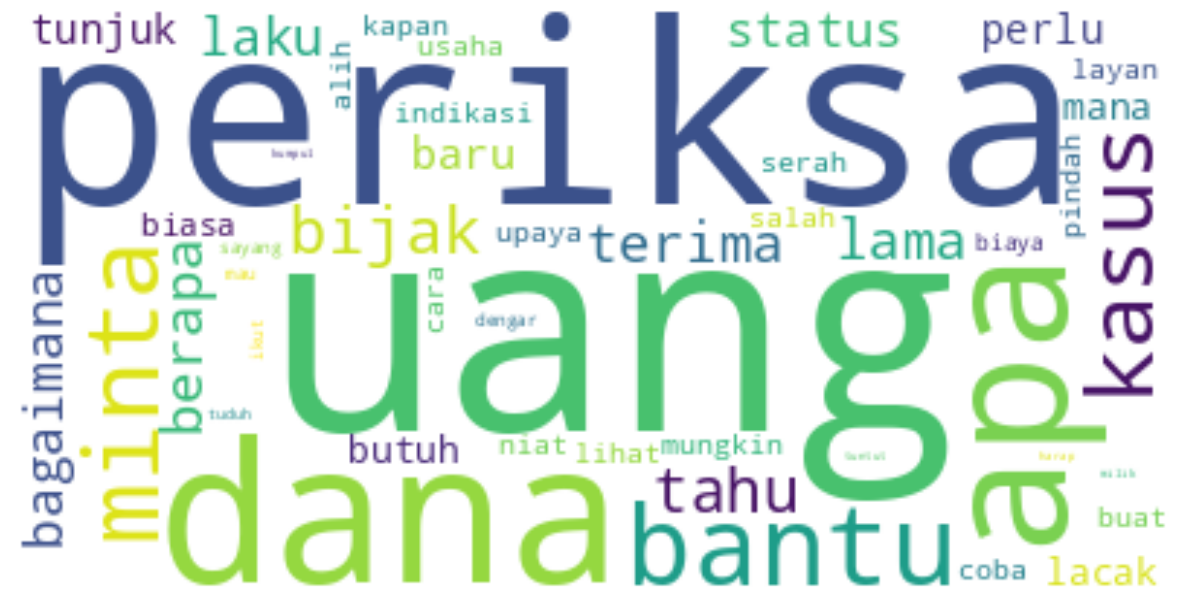



Frekuensi kata paling banyak:
[('uang', 311), ('periksa', 269), ('dana', 256), ('apa', 184), ('bantu', 133), ('minta', 114), ('kasus', 93), ('bijak', 82), ('tahu', 78), ('terima', 65)]


Frekuensi kata paling sedikit:
[('buat', 12), ('salah', 12), ('biaya', 8), ('mau', 5), ('dengar', 5), ('sayang', 5), ('ikut', 5), ('tuduh', 4), ('harap', 3), ('tuntut', 3), ('kumpul', 3), ('milik', 3), ('hak', 1), ('atas', 1), ('sesuai', 1), ('kompensasi', 1), ('aku', 1), ('ganti', 1), ('proses', 1), ('laksana', 1), ('imbal', 1), ('ringan', 1), ('insentif', 1), ('kamu', 1), ('engkau', 1), ('kau', 1), ('olah', 1), ('saring', 1), ('murni', 1)]


In [ ]:
word_cloud(data)

### FEEDBACK

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='FEEDBACK'].copy().reset_index(drop=True)

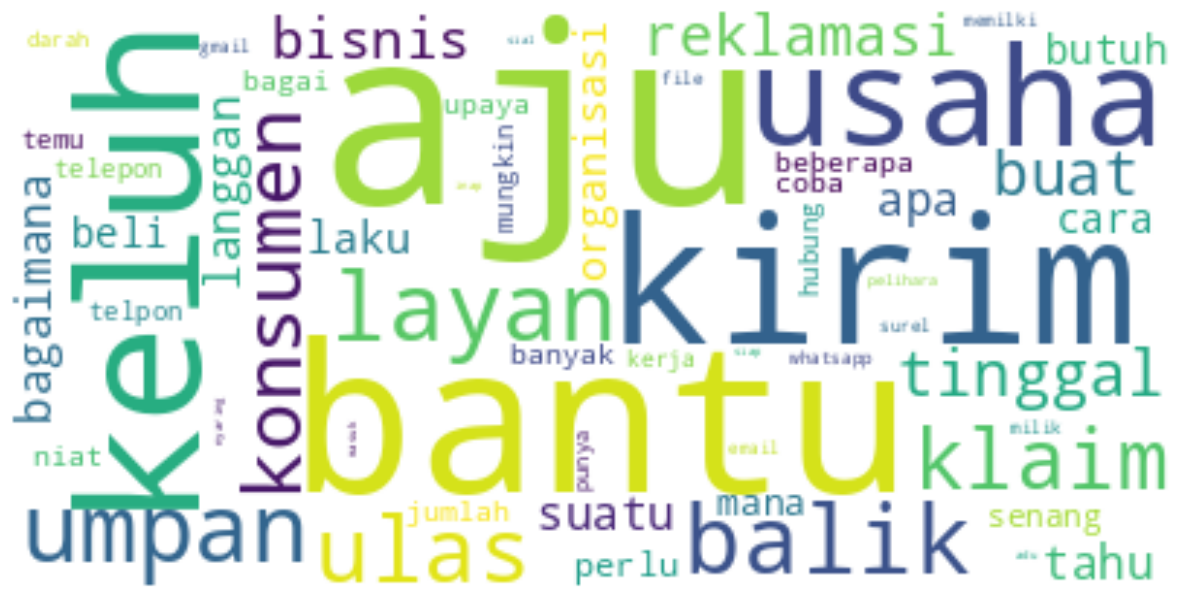



Frekuensi kata paling banyak:
[('aju', 240), ('bantu', 167), ('kirim', 165), ('keluh', 147), ('usaha', 146), ('layan', 144), ('umpan', 144), ('balik', 144), ('ulas', 128), ('klaim', 112)]


Frekuensi kata paling sedikit:
[('telpon', 14), ('hubung', 14), ('temu', 14), ('kerja', 11), ('darah', 8), ('punya', 8), ('milik', 6), ('memilki', 6), ('file', 5), ('email', 5), ('surel', 5), ('gmail', 5), ('whatsapp', 5), ('pelihara', 4), ('inap', 3), ('adu', 3), ('sial', 3), ('nyaring', 3), ('masuk', 3), ('siap', 3), ('tinjau', 2), ('produk', 2), ('terima', 2), ('dengar', 2), ('cabut', 1), ('lawan', 1), ('puas', 1), ('konsumsi', 1), ('nyata', 1)]


In [ ]:
word_cloud(data)

### CONTACT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CONTACT'].copy().reset_index(drop=True)

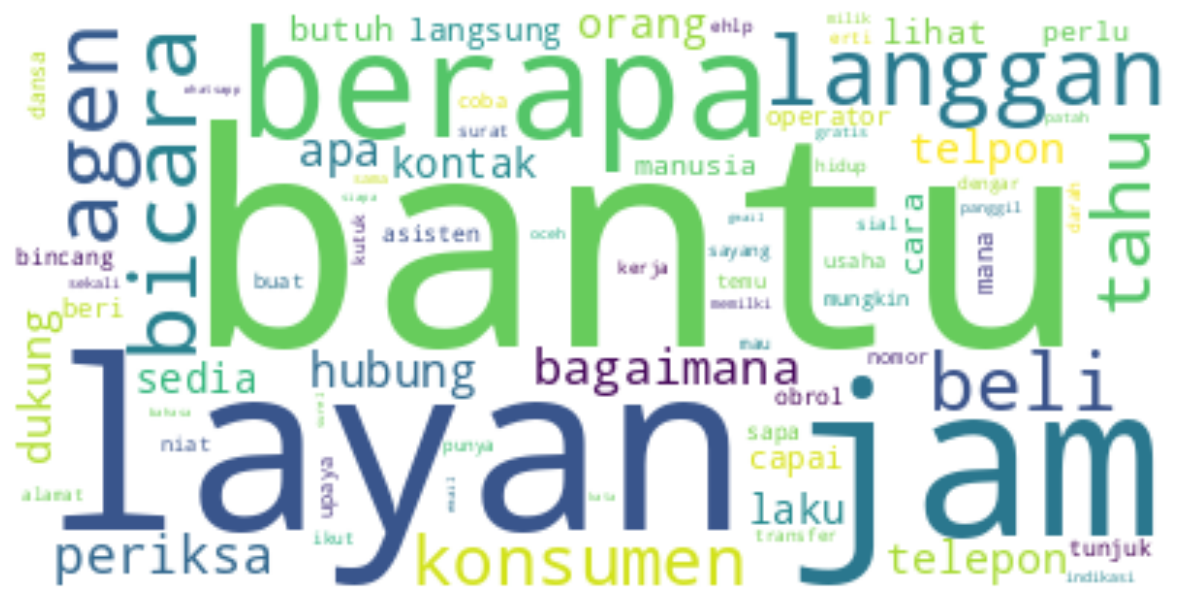



Frekuensi kata paling banyak:
[('bantu', 395), ('layan', 352), ('jam', 271), ('berapa', 260), ('langgan', 243), ('bicara', 232), ('agen', 226), ('beli', 162), ('tahu', 161), ('konsumen', 160)]


Frekuensi kata paling sedikit:
[('milik', 4), ('gratis', 4), ('panggil', 4), ('sama', 4), ('sekali', 4), ('patah', 4), ('oceh', 4), ('indikasi', 4), ('memilki', 4), ('siapa', 3), ('bahasa', 3), ('email', 3), ('kata', 3), ('surel', 3), ('gmail', 3), ('whatsapp', 3), ('kamu', 2), ('terima', 2), ('aku', 2), ('kalian', 2), ('engkau', 2), ('cutomer', 1), ('frasa', 1), ('jelas', 1), ('kalimat', 1), ('bayang', 1), ('laksana', 1), ('tuhan', 1), ('pakai', 1)]


In [ ]:
word_cloud(data)

### ACCOUNT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ACCOUNT'].copy().reset_index(drop=True)

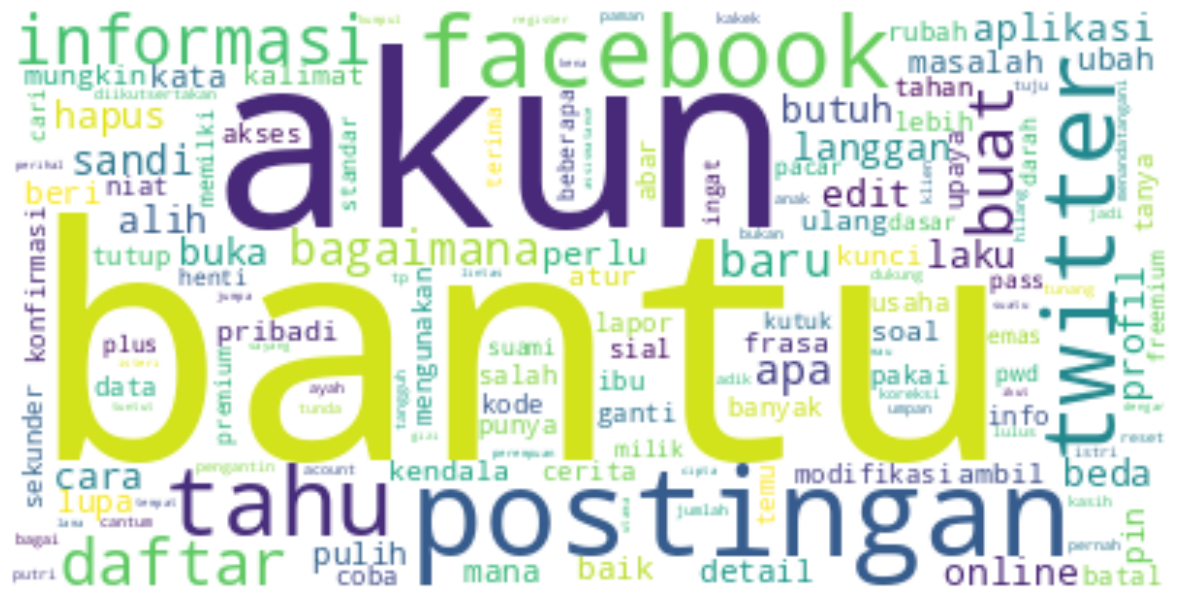



Frekuensi kata paling banyak:
[('bantu', 979), ('akun', 472), ('postingan', 472), ('facebook', 470), ('twitter', 463), ('tahu', 448), ('informasi', 434), ('buat', 410), ('daftar', 408), ('bagaimana', 370)]


Frekuensi kata paling sedikit:
[('tuntut', 3), ('kumpul', 3), ('jumpa', 3), ('dengar', 3), ('sayang', 3), ('ikut', 3), ('perihal', 3), ('registrasi', 2), ('laksana', 2), ('satu', 1), ('anggota', 1), ('ikat', 1), ('personal', 1), ('password', 1), ('tarik', 1), ('celah', 1), ('anggap', 1), ('tomy', 1), ('beli', 1), ('konsumen', 1), ('bunuh', 1), ('lepas', 1), ('username', 1), ('client', 1), ('user', 1), ('pandang', 1), ('sebut', 1), ('babap', 1), ('winata', 1)]


In [ ]:
word_cloud(data)

### DELIVERY

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='DELIVERY'].copy().reset_index(drop=True)

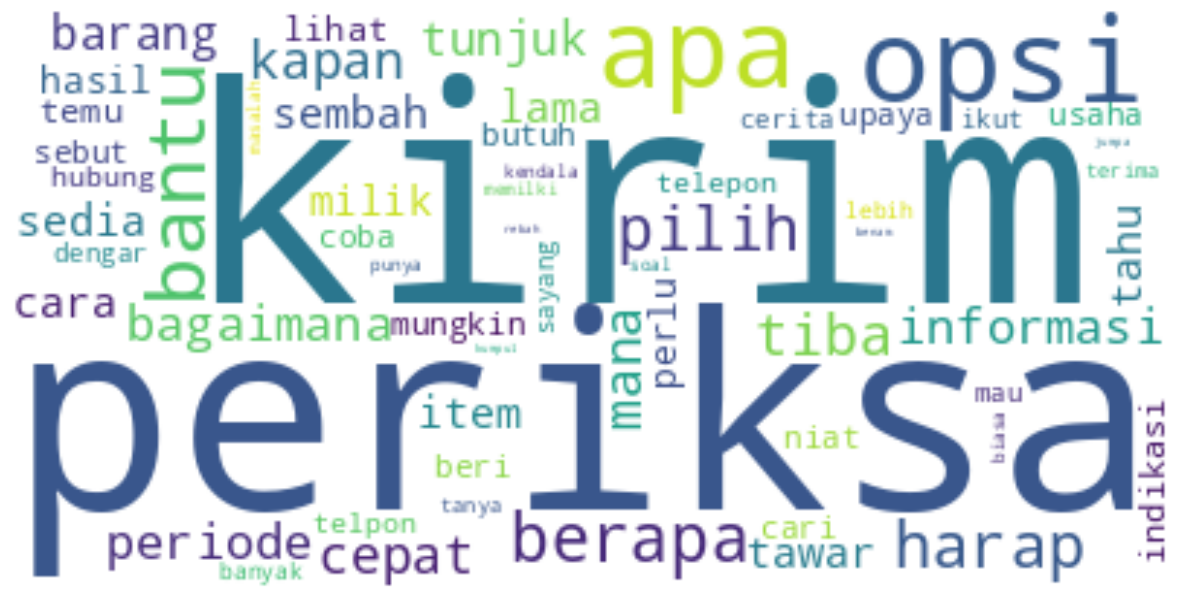



Frekuensi kata paling banyak:
[('kirim', 427), ('periksa', 386), ('opsi', 326), ('apa', 284), ('bantu', 135), ('berapa', 91), ('harap', 86), ('pilih', 79), ('tiba', 69), ('cepat', 58)]


Frekuensi kata paling sedikit:
[('sebut', 15), ('usaha', 15), ('upaya', 15), ('niat', 15), ('beri', 14), ('mungkin', 13), ('cari', 12), ('butuh', 12), ('telepon', 9), ('telpon', 9), ('hubung', 9), ('cerita', 8), ('mau', 8), ('dengar', 8), ('sayang', 8), ('ikut', 8), ('lebih', 6), ('banyak', 6), ('tanya', 4), ('terima', 4), ('masalah', 3), ('punya', 3), ('biasa', 3), ('soal', 3), ('kendala', 3), ('memilki', 3), ('rebah', 1), ('benam', 1), ('kumpul', 1)]


In [ ]:
word_cloud(data)

### NEWSLETTER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='NEWSLETTER'].copy().reset_index(drop=True)

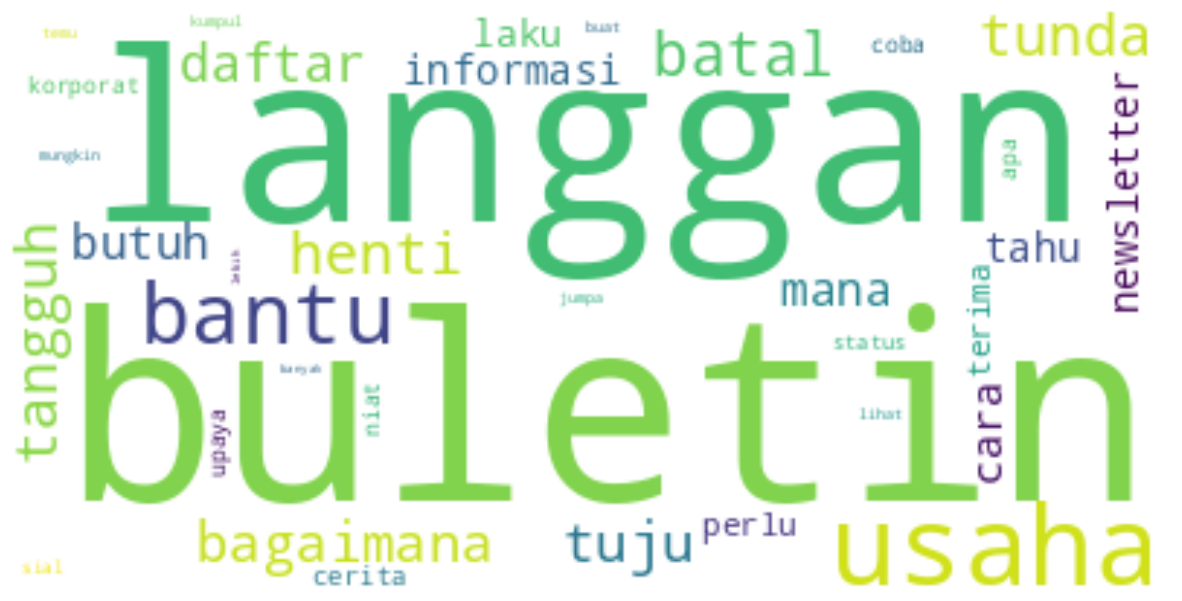



Frekuensi kata paling banyak:
[('buletin', 308), ('langgan', 259), ('usaha', 192), ('bantu', 98), ('batal', 43), ('henti', 40), ('tunda', 38), ('tangguh', 38), ('bagaimana', 36), ('tuju', 36)]


Frekuensi kata paling sedikit:
[('tahu', 19), ('newsletter', 19), ('informasi', 18), ('laku', 16), ('terima', 12), ('perlu', 12), ('cerita', 8), ('korporat', 6), ('coba', 6), ('apa', 6), ('upaya', 6), ('niat', 6), ('status', 5), ('sial', 4), ('lihat', 3), ('temu', 3), ('mungkin', 3), ('buat', 3), ('kumpul', 3), ('jumpa', 3), ('lebih', 2), ('banyak', 2), ('darah', 1), ('tunjuk', 1), ('periksa', 1), ('milik', 1), ('tempat', 1), ('laksana', 1), ('punya', 1)]


In [ ]:
word_cloud(data)

## Stat test

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


chi2_check = {}


prob = 0.95
chi, p, dof, ex = chi2_contingency(pd.crosstab(train_df['category'], train_df['intent']))
chi2_check.setdefault('Feature',[]).append('category')
chi2_check.setdefault('chi',[]).append(chi)
chi2_check.setdefault('critical 0.05',[]).append(chi2.ppf(prob, dof))
chi2_check.setdefault('p-value',[]).append(round(p, 10))
chi2_check.setdefault('alpha',[]).append('0.05')

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

Feature      chi  critical 0.05  p-value alpha
0  category  98800.0     298.610588      0.0  0.05



*   If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
*   If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

*   If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
*   If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

Berdasarkan Chi2 test, dapat diketahui bahwasanya variabel category memiliki pengaruh yang signifikan terhadap variabel target intent. Kita dapat menggunakan variabel category untuk digunakan dalam pemodelan

# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import re
import math
import string
import unicodedata

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
train_df

utterance        intent category  \
0                  mungkin batal pesan saya buat  cancel_order    ORDER   
1                                    pesan batal  cancel_order    ORDER   
2        perlu bantu batal pesan akhir saya buat  cancel_order    ORDER   
3                  masalah batal pesan saya buat  cancel_order    ORDER   
4     tidak tahu bagaimana batal pesan saya buat  cancel_order    ORDER   
...                                          ...           ...      ...   
9875      bisa indikasi saya status kembali dana  track_refund   REFUND   
9876                        deteksi kembali dana  track_refund   REFUND   
9877    usaha periksa ada yang baru kembali dana  track_refund   REFUND   
9878    upaya periksa ada yang baru kembali dana  track_refund   REFUND   
9879     niat periksa ada yang baru kembali dana  track_refund   REFUND   

      length  
0          5  
1          2  
2          7  
3          5  
4          7  
...      ...  
9875       6  
9876       3  
9877       7  
9878       7  
9879       7  

[9880 rows x 4 columns]

In [ ]:
import json

# Specify the path to your JSON file
json_file_path = '/content/tambahan.json'

# Open the JSON file and load the data
with open(json_file_path, 'r') as json_file:
    annoying_word = json.load(json_file)

# Print the loaded data (list of strings)
print(annoying_word)

{'SHIPPING_ADDRESS': {'asistance': 'bantuan', 'addresx': 'alamat', 'uupdatte': 'pembaruan', 'addrses': 'alamat', 'hwat': 'apa', 'lelivery': 'pengiriman', 'can': 'bisa', 'unchange': 'tidak berubah', 'it': '', 'kodinasi': 'koordinasi'}, 'CANCELLATION_FEE': {'termniasi': 'terminasi', 'cancellatino': 'batal', 'earpy': '', 'eazrly': '', 'hwat': 'apa', 'exiut': 'keluar', 'cannott': 'tidak bisa', 'chck': 'cek', 'czncellation': 'batal', 'termimasi': 'terminasi'}, 'PAYMENT': {'whee': '', 'paymen': 'pembayaran', 'pahment': 'pembayaran', 'uaccept': 'tidak terima', 'ccan': 'bisa', 'urallowed': 'tidak diizinkan', 'cani': 'bisa', 'metos': 'metode', 'amex': '', 'paymet': 'pembayaran', 'assisrance': 'bantuan', 'otion': '', 'metod': 'metode'}, 'REFUND': {'rabat': ''}, 'FEEDBACK': {'lodge': 'mengajukan', 'helo': '', 'lcaim': 'klaim', 'hepp': 'tolong', 'relkamasi': 'reklamasi', 'asustomer': 'pelanggan', 'commpany': 'perusahaan', 'hbelp': 'tolong', 'reclamaqtion': 'reklamasi', 'rfeclamation': 'reklamasi',

In [ ]:
#import spacy
#
#nlp = spacy.blank("id")
#nlp.add_pipe("lemmatizer", config={"mode": "lookup"})
#nlp.initialize()

In [ ]:
#doc = nlp('dialah')
#for token in doc:
#  print(token.text, token.lemma_)

dialah dialah


In [ ]:
'''idx = []

for category in df.category.unique():

  if category in list(annoying_word.keys()):
    temp = []

    for index, sentence in df['utterance'][df['category'] == category].items():

        for word in list(annoying_word[category].keys()):

            if word.lower() in sentence.lower().split():
                temp.append(index)

    idx.extend(list(set(temp)))'''

In [ ]:
#idx.sort()

In [ ]:
class Prepro(BaseEstimator, TransformerMixin):

    def normalisasi(self, df):
        df['utterance'] = df['utterance'].apply(lambda x: x.lower())

        for category in df.category.unique():

          if category in list(annoying_word.keys()):

            for word, replacement in annoying_word[category].items():
              df.utterance[df['category']==category] = df.utterance[df['category']==category].str.replace(r'\b{}\b'.format(word), replacement)

        return df

    def cleansing(self, text):

        text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
        text = re.sub(r'[0-9]', '', text) # angka
        text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
        text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
        text = re.sub(r' +', ' ', text)
        text = text.strip()

        return text.lower()

    def stopwords(self, text):

        factory = StopWordRemoverFactory()
        stopword = factory.create_stop_word_remover()

        return stopword.remove(text)

    def stemming(self, text):

        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        return stemmer.stem(text)

    def fit(self, X, y=None):
        return self

    def transform(self, X, train=True):

        if train == True:
            X_copy = X.copy()  # Make a copy to avoid modifying the original DataFrame
            X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stopwords(x))
            X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stemming(x))

        else:
            X_copy = self.normalisasi(X.copy())  # Make a copy to avoid modifying the original DataFrame
            X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.cleansing(x))
            X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stopwords(x))
            X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stemming(x))

        return X_copy

In [ ]:
valid_df = pd.read_csv('/content/drive/MyDrive/DSC dataset/df_validation.csv')

In [ ]:
preprocessor = Prepro()
#train_df = preprocessor.transform(df, train=True)

In [ ]:
valid_df = preprocessor.transform(valid_df, train=False)

In [ ]:
valid_df['length'] = valid_df['utterance'].apply(lambda x: len(x.split()))

In [ ]:
train_df

utterance        intent category  \
0                  mungkin batal pesan saya buat  cancel_order    ORDER   
1                                    pesan batal  cancel_order    ORDER   
2        perlu bantu batal pesan akhir saya buat  cancel_order    ORDER   
3                  masalah batal pesan saya buat  cancel_order    ORDER   
4     tidak tahu bagaimana batal pesan saya buat  cancel_order    ORDER   
...                                          ...           ...      ...   
9875      bisa indikasi saya status kembali dana  track_refund   REFUND   
9876                        deteksi kembali dana  track_refund   REFUND   
9877    usaha periksa ada yang baru kembali dana  track_refund   REFUND   
9878    upaya periksa ada yang baru kembali dana  track_refund   REFUND   
9879     niat periksa ada yang baru kembali dana  track_refund   REFUND   

      length  
0          5  
1          2  
2          7  
3          5  
4          7  
...      ...  
9875       6  
9876       3  
9877       7  
9878       7  
9879       7  

[9880 rows x 4 columns]

In [ ]:
valid_df

utterance        intent category  \
0                 ingin bantu batal pesan telah buat  cancel_order    ORDER   
1              mana bisa dapat informasi batal pesan  cancel_order    ORDER   
2                            bantu batal pesan akhir  cancel_order    ORDER   
3                  butuh bantu batal pesan saya buat  cancel_order    ORDER   
4    tidak tahu bagaimana bisa batal pesan saya buat  cancel_order    ORDER   
..                                               ...           ...      ...   
813                 coba periksa status kembali dana  track_refund   REFUND   
814          ingin bantu periksa status kembali dana  track_refund   REFUND   
815          ingin bantu periksa status kembali dana  track_refund   REFUND   
816       bagaimana cara periksa status kembali dana  track_refund   REFUND   
817                          mana lacak kembali dana  track_refund   REFUND   

    tags  length  
0      B       6  
1    BIM       6  
2      B       4  
3      B       6  
4     BE       8  
..   ...     ...  
813    B       5  
814    B       6  
815    B       6  
816   BI       6  
817   BI       4  

[818 rows x 5 columns]

In [ ]:
#train_df.to_csv('/content/drive/MyDrive/DSC dataset/df_train_modeling.csv', index=False)
#train_df = pd.read_csv('/content/drive/MyDrive/DSC dataset/df_train_modeling.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['intent'] = le.fit_transform(train_df['intent'])
valid_df['intent'] = le.transform(valid_df['intent'])

In [ ]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle df

In [ ]:
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_df

utterance  intent  category  \
0     niat periksa jam berapa dapat telpon layan kon...       8   CONTACT   
1     tidak tahu bagaimana bisa bicara layan beli darah       8   CONTACT   
2                                   butuh dukung daftar      21   ACCOUNT   
3            tidak tahu bagaimana bisa lihat opsi bayar       5   PAYMENT   
4                       ingin bantu edit info postingan      14   ACCOUNT   
...                                                 ...     ...       ...   
9875  bantu lihat jam berapa dapat capai bantu konsumen       8   CONTACT   
9876  tidak tahu cara periksa metodologi bayar diiji...       5   PAYMENT   
9877                         upaya aju klaim organisasi       7  FEEDBACK   
9878                    butuh bantu cantum metode bayar       5   PAYMENT   
9879       harus modifikasi jumlah detail pribadi bantu      14   ACCOUNT   

      length  
0          8  
1          8  
2          3  
3          7  
4          5  
...      ...  
9875       8  
9876       7  
9877       4  
9878       5  
9879       6  

[9880 rows x 4 columns]

In [ ]:
valid_df

utterance  intent          category  \
0                      mana dapat ubah alamat kirim       2  SHIPPING_ADDRESS   
1                 bisa bantu edit informasi pribadi      14           ACCOUNT   
2           ingin bantu periksa status kembali dana      26            REFUND   
3                 bantu batal langgan buletin usaha      17        NEWSLETTER   
4                           apa status kembali dana      26            REFUND   
..                                              ...     ...               ...   
813                       mungkin ubah alamat kirim       2  SHIPPING_ADDRESS   
814  berapa banyak akan tagih untuk langgar kontrak       3  CANCELLATION_FEE   
815                                bisa hubung agen       9           CONTACT   
816                   mungkin modifikasi data userr      14           ACCOUNT   
817                        mana periksa biaya batal       3  CANCELLATION_FEE   

      tags  length  
0       BI       5  
1       BI       5  
2        B       6  
3        B       5  
4       BI       4  
..     ...     ...  
813    BIP       4  
814     BI       7  
815     BI       3  
816  BILQZ       4  
817    BIM       4  

[818 rows x 5 columns]

In [ ]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}


In [ ]:
re = {v:k for k,v in dictionary.items()}
print(re)

{0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
train = train_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
valid = valid_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
train = train.drop(columns=['category', 'length'])
valid = valid.drop(columns=['category', 'tags', 'length'])

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train)
valid_dataset = Dataset.from_dict(valid)

In [ ]:
import datasets
dd = datasets.DatasetDict({"train":train_dataset,"validation":valid_dataset})

# Modeling

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length')

In [ ]:
tokenized_datasets = dd.map(tokenize_function, batched=True)

Map:   0%|          | 0/9880 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets['train'][0])

{'text': 'niat periksa jam berapa dapat telpon layan konsumen', 'label': 8, 'input_ids': [101, 9152, 4017, 2566, 5480, 3736, 9389, 2022, 2527, 4502, 4830, 4502, 2102, 10093, 26029, 3913, 2319, 12849, 3619, 27417, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 9880
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 818
    })
})

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(
    'text'
)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
data_collator(tokenized_datasets["train"][0])

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': tensor([  101,  9152,  4017,  2566,  5480,  3736,  9389,  2022,  2527,  4502,
         4830,  4502,  2102, 10093, 26029,  3913,  2319, 12849,  3619, 27417,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [ ]:
import evaluate

#accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    metric1 = evaluate.load("accuracy")
    metric2 = evaluate.load("precision")
    metric3 = evaluate.load("recall")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric1.compute(predictions=predictions, references=labels)['accuracy']
    precision = metric2.compute(predictions=predictions, references=labels, average='macro')["precision"]
    recall = metric3.compute(predictions=predictions, references=labels, average='macro')["recall"]
    return {"accuracy": accuracy, "precision": precision, "recall": recall}

In [ ]:
id2label = {0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}
label2id = {'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=27, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

In [ ]:
from transformers import TrainerCallback, TrainerControl
import numpy as np

class LossEqualityCallback(TrainerCallback):
    def __init__(self, max_loss_diff=0.01):
        self.max_loss_diff = max_loss_diff

    #def on_epoch_end(self, args, state, control, **kwargs):

        #log_history = state.log_history[-1].items()

        #return log_history


    #def on_evaluate(self, args, state, control, logs=None, **kwargs):

         #if logs is not None and 'eval_loss' in logs:
         #   log_history = self.on_epoch_end(args, state, control)  # Corrected call
         #   eval_loss = logs['eval_loss']
         #   print(log_history)
         #   print(eval_loss)

    def on_log(self, args, state, control, val={}, **kwargs):

        if 'logs' in kwargs:

          if 'loss' in kwargs['logs']:
            val.setdefault('loss', []).append(kwargs['logs']['loss'])
          elif 'eval_loss' in kwargs['logs']:
            val.setdefault('eval_loss', []).append(kwargs['logs']['eval_loss'])

        if 'loss' in val and 'eval_loss' in val:

          if len(val['loss']) == len(val['eval_loss']):
            if val['loss'][-1] < val['eval_loss'][-1] and abs(val['loss'][-1] - val['eval_loss'][-1]) > self.max_loss_diff:

              control.should_training_stop = True
              print('TRAINING STOP')

              print(f'val: {val}')
              print(state.log_history)



    '''def on_epoch_end(self, args, state, control, **kwargs):
        #validation_loss = trainer.evaluate(eval_dataset=self.trainer.eval_dataset)['eval_loss']
        log_history = state.log_history[-1].items()
        metric = state.best_metric
        print(f'log history: {log_history} metric: {metric}')
        print('='*10)
        #avg_train_loss = state.log_history[-1]['Training Loss']
        #avg_val_loss = state.log_history[-1]['Validation Loss']
#
        #if avg_train_loss < avg_val_loss:
#
        #    if abs(avg_train_loss - avg_val_loss) > self.max_loss_diff:
        #        control.should_training_stop = True
        #        print("Stopping training: Training and validation loss difference exceeded threshold.")'''

In [ ]:
custom_callback = LossEqualityCallback()

In [ ]:
batch_size = 16
num_train_epochs = 10
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size

training_args = TrainingArguments(
    output_dir='distilbert-base-uncased-DSC-new-cllbck',
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    weight_decay=0.0001,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True, #ini dimatiin klo misal mau make callback
    push_to_hub=True,
    logging_steps=logging_steps
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[custom_callback]
)

Cloning https://huggingface.co/GhifSmile/distilbert-base-uncased-DSC-new-cllbck into local empty directory.


In [ ]:
trainer.train()

TRAINING STOP
val: {'loss': [0.5329, 0.0853], 'eval_loss': [0.18118338286876678, 0.11595726758241653]}
[{'loss': 0.5329, 'learning_rate': 0.00018003236245954694, 'epoch': 1.0, 'step': 617}, {'eval_loss': 0.18118338286876678, 'eval_accuracy': 0.9511002444987775, 'eval_precision': 0.9577270325939009, 'eval_recall': 0.9518420899684517, 'eval_runtime': 17.7638, 'eval_samples_per_second': 46.049, 'eval_steps_per_second': 2.927, 'epoch': 1.0, 'step': 618}, {'loss': 0.0853, 'learning_rate': 0.00016006472491909385, 'epoch': 2.0, 'step': 1234}, {'eval_loss': 0.11595726758241653, 'eval_accuracy': 0.9816625916870416, 'eval_precision': 0.9831477948925221, 'eval_recall': 0.9817519667621086, 'eval_runtime': 17.0364, 'eval_samples_per_second': 48.015, 'eval_steps_per_second': 3.052, 'epoch': 2.0, 'step': 1236}]
TRAINING STOP
val: {'loss': [0.5329, 0.0853], 'eval_loss': [0.18118338286876678, 0.11595726758241653]}
[{'loss': 0.5329, 'learning_rate': 0.00018003236245954694, 'epoch': 1.0, 'step': 617}, {'

TrainOutput(global_step=1236, training_loss=0.3086756101016763, metrics={'train_runtime': 1013.4673, 'train_samples_per_second': 97.487, 'train_steps_per_second': 6.098, 'total_flos': 2618722807234560.0, 'train_loss': 0.3086756101016763, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.11595726758241653,
 'eval_accuracy': 0.9816625916870416,
 'eval_precision': 0.9831477948925221,
 'eval_recall': 0.9817519667621086,
 'eval_runtime': 17.1308,
 'eval_samples_per_second': 47.75,
 'eval_steps_per_second': 3.035,
 'epoch': 2.0}

In [ ]:
trainer.push_to_hub()

To https://huggingface.co/GhifSmile/distilbert-base-uncased-DSC-new-cllbck
   3514fc0..21d98ef  main -> main

   3514fc0..21d98ef  main -> main

To https://huggingface.co/GhifSmile/distilbert-base-uncased-DSC-new-cllbck
   21d98ef..73cb945  main -> main

   21d98ef..73cb945  main -> main



'https://huggingface.co/GhifSmile/distilbert-base-uncased-DSC-new-cllbck/commit/21d98efea8ca5ef974af7cd2ecaf689411e1e21c'

In [ ]:
trainer.save_model("/content/drive/MyDrive/intent-classification-model-cllbck")

In [ ]:
trainer.state.log_history

[{'loss': 0.5329,
  'learning_rate': 0.00018003236245954694,
  'epoch': 1.0,
  'step': 617},
 {'eval_loss': 0.18118338286876678,
  'eval_accuracy': 0.9511002444987775,
  'eval_precision': 0.9577270325939009,
  'eval_recall': 0.9518420899684517,
  'eval_runtime': 17.7638,
  'eval_samples_per_second': 46.049,
  'eval_steps_per_second': 2.927,
  'epoch': 1.0,
  'step': 618},
 {'loss': 0.0853,
  'learning_rate': 0.00016006472491909385,
  'epoch': 2.0,
  'step': 1234},
 {'eval_loss': 0.11595726758241653,
  'eval_accuracy': 0.9816625916870416,
  'eval_precision': 0.9831477948925221,
  'eval_recall': 0.9817519667621086,
  'eval_runtime': 17.0364,
  'eval_samples_per_second': 48.015,
  'eval_steps_per_second': 3.052,
  'epoch': 2.0,
  'step': 1236},
 {'train_runtime': 1013.4673,
  'train_samples_per_second': 97.487,
  'train_steps_per_second': 6.098,
  'total_flos': 2618722807234560.0,
  'train_loss': 0.3086756101016763,
  'epoch': 2.0,
  'step': 1236},
 {'eval_loss': 0.11595726758241653,
  'e

## Inference

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/intent-classification-model-cllbck")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/intent-classification-model-cllbck")

In [ ]:
text = ["bantu nuat akun"]
encoding = tokenizer(text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
predictions = outputs.logits.argmax(-1)

In [ ]:
print(predictions)

tensor([10])


# Data Augmentasi

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSC dataset/df_train.csv')

In [ ]:
df

utterance        intent  \
0     Apakah mungkin untuk membatalkan pesanan yang ...  cancel_order   
1                                    pesanan pembatalan  cancel_order   
2     saya perlu bantuan membatalkan pesanan terakhi...  cancel_order   
3     masalah dengan membatalkan pesanan yang saya buat  cancel_order   
4     Saya tidak tahu bagaimana membatalkan pesanan ...  cancel_order   
...                                                 ...           ...   
6534  Saya tidak tahu apa yang harus saya lakukan un...  track_refund   
6535                   Periksa status pengembalian dana  track_refund   
6536      Bantu saya memeriksa status pengembalian dana  track_refund   
6537  Bagaimana cara memeriksa apakah ada pembaruan ...  track_refund   
6538  Bagaimana cara memeriksa apakah ada yang salah...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
df = df.copy().drop_duplicates(subset=['utterance']).reset_index(drop=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710 entries, 0 to 4709
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  4710 non-null   object
 1   intent     4710 non-null   object
 2   category   4710 non-null   object
 3   tags       4710 non-null   object
dtypes: object(4)
memory usage: 147.3+ KB


In [ ]:
df.isna().sum()

utterance    0
intent       0
category     0
tags         0
dtype: int64

In [ ]:
df = df.drop(columns=['tags'])

In [ ]:
import json

# Specify the path to your JSON file
json_file_path = '/content/tambahan.json'

# Open the JSON file and load the data
with open(json_file_path, 'r') as json_file:
    annoying_word = json.load(json_file)

# Print the loaded data (list of strings)
print(annoying_word)

{'SHIPPING_ADDRESS': {'asistance': 'bantuan', 'addresx': 'alamat', 'uupdatte': 'pembaruan', 'addrses': 'alamat', 'hwat': 'apa', 'lelivery': 'pengiriman', 'can': 'bisa', 'unchange': 'tidak berubah', 'it': '', 'kodinasi': 'koordinasi'}, 'CANCELLATION_FEE': {'termniasi': 'terminasi', 'cancellatino': 'batal', 'earpy': '', 'eazrly': '', 'hwat': 'apa', 'exiut': 'keluar', 'cannott': 'tidak bisa', 'chck': 'cek', 'czncellation': 'batal', 'termimasi': 'terminasi'}, 'PAYMENT': {'whee': '', 'paymen': 'pembayaran', 'pahment': 'pembayaran', 'uaccept': 'tidak terima', 'ccan': 'bisa', 'urallowed': 'tidak diizinkan', 'cani': 'bisa', 'metos': 'metode', 'amex': '', 'paymet': 'pembayaran', 'assisrance': 'bantuan', 'otion': '', 'metod': 'metode'}, 'REFUND': {'rabat': ''}, 'FEEDBACK': {'lodge': 'mengajukan', 'helo': '', 'lcaim': 'klaim', 'hepp': 'tolong', 'relkamasi': 'reklamasi', 'asustomer': 'pelanggan', 'commpany': 'perusahaan', 'hbelp': 'tolong', 'reclamaqtion': 'reklamasi', 'rfeclamation': 'reklamasi',

In [ ]:
def normalisasi(df):
    df['utterance'] = df['utterance'].apply(lambda x: x.lower())

    for category in df.category.unique():

      if category in list(annoying_word.keys()):

        for word, replacement in annoying_word[category].items():
          df.utterance[df['category']==category] = df.utterance[df['category']==category].str.replace(r'\b{}\b'.format(word), replacement)

    return df

In [ ]:
df = normalisasi(df) #apply normalisasi to df

In [ ]:
def cleansing(text):

    text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
    text = re.sub(r'[0-9]', '', text) # angka
    text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
    text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
    text = re.sub(r' +', ' ', text)
    text = text.strip()

    return text.lower()

In [ ]:
df['utterance'] = df['utterance'].apply(lambda x: cleansing(x)) #apply cleansing to each row of utterance in df

In [ ]:
df

utterance        intent category
0     apakah mungkin untuk membatalkan pesanan yang ...  cancel_order    ORDER
1                                    pesanan pembatalan  cancel_order    ORDER
2     saya perlu bantuan membatalkan pesanan terakhi...  cancel_order    ORDER
3     masalah dengan membatalkan pesanan yang saya buat  cancel_order    ORDER
4     saya tidak tahu bagaimana membatalkan pesanan ...  cancel_order    ORDER
...                                                 ...           ...      ...
4705  ada sesuatu yang baru dalam pengembalian dana ...  track_refund   REFUND
4706  di mana saya dapat memeriksa apakah ada yang s...  track_refund   REFUND
4707  saya ingin bantuan untuk memeriksa apakah ada ...  track_refund   REFUND
4708  saya tidak tahu apa yang harus saya lakukan un...  track_refund   REFUND
4709  bagaimana cara memeriksa apakah ada pembaruan ...  track_refund   REFUND

[4710 rows x 3 columns]

In [ ]:
from gensim.models import Word2Vec
import random

# Load the pre-trained Word2Vec model
model = Word2Vec.load('/content/drive/MyDrive/idwiki_word2vec.model')

In [ ]:
def aug_word2vec(text):
  # Convert the sentence to a list of words
  words = text.split()

  # Set the number of similar words to use for augmentation
  n_similar = 3

  stopword = StopWordRemoverFactory().get_stop_words()

  # Generate augmented sentences
  augmented_sentences = []
  similar_words = {}

  for word in words:

      if word in model.wv.key_to_index and word not in stopword:

        if model.wv.most_similar(word, topn=n_similar)[-1][1] > 0.7:

            # Get the `n_similar` most similar words to the current word
            similar_word = [x[0] for x in model.wv.most_similar(word, topn=n_similar)]
            similar_words.setdefault(word, []).extend(similar_word)

  if similar_words:
    for n in range(n_similar):

      augmented_words = words.copy()

      for i, word in enumerate(words):

        if word in list(similar_words.keys()):
         augmented_words[i] = similar_words[word][n]

      augmented_sentences.append(' '.join(augmented_words))

    return augmented_sentences


In [ ]:
def aug_text(x, intent, category):

  data = []

  for i in x:

    if aug_word2vec(i) is not None:
      data.extend(aug_word2vec(i))

  return {'utterance':data, 'intent':[intent]*len(data), 'category': category*len(data)}

In [ ]:
# make empty pandas df and adding each colums value based on augmented text

dataset = []

for intent in list(df.intent.unique()):

  data = df.utterance[df['intent'] == intent].copy()
  category = list(df.category[df.intent == intent].unique())

  dataset.append(aug_text(data, intent, category))

In [ ]:
columns = ['utterance', 'intent', 'category']
df_augmentasi = pd.DataFrame(columns=columns)

In [ ]:
df_augmentasi

Empty DataFrame
Columns: [utterance, intent, category]
Index: []

In [ ]:
for data in dataset:
    df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)

In [ ]:
df_augmentasi

utterance        intent category
0     apakah mungkin untuk menunda pesanan yang saya...  cancel_order    ORDER
1     apakah mungkin untuk menangguhkan pesanan yang...  cancel_order    ORDER
2     apakah mungkin untuk menyetujui pesanan yang s...  cancel_order    ORDER
3     saya harus bantuan menunda pesanan terakhir ya...  cancel_order    ORDER
4     saya dapat bantuan menangguhkan pesanan terakh...  cancel_order    ORDER
...                                                 ...           ...      ...
9031  menyayangimu anda menunjukan status pengembali...  track_refund   REFUND
9032  ikutlah anda mengindikasikan status pengembali...  track_refund   REFUND
9033  saya berusaha memeriksa apakah ada sesuatu yan...  track_refund   REFUND
9034  saya berupaya memeriksa apakah ada sesuatu yan...  track_refund   REFUND
9035  saya berniat memeriksa apakah ada sesuatu yang...  track_refund   REFUND

[9036 rows x 3 columns]

In [ ]:
df_augmentasi.to_csv('/content/drive/MyDrive/DSC dataset/df_augmentasi.csv', index=False)

In [ ]:
df_augmentasi = pd.read_csv('/content/drive/MyDrive/DSC dataset/df_train_augmentasi.csv')

In [ ]:
df_merge =  pd.concat([df, df_augmentasi], ignore_index=True, sort=False)

In [ ]:
df_merge = df_merge.reset_index(drop=True)

In [ ]:
df_merge

utterance        intent  \
0      apakah mungkin untuk membatalkan pesanan yang ...  cancel_order   
1                                     pesanan pembatalan  cancel_order   
2      saya perlu bantuan membatalkan pesanan terakhi...  cancel_order   
3      masalah dengan membatalkan pesanan yang saya buat  cancel_order   
4      saya tidak tahu bagaimana membatalkan pesanan ...  cancel_order   
...                                                  ...           ...   
13741  menyayangimu anda menunjukan status pengembali...  track_refund   
13742  ikutlah anda mengindikasikan status pengembali...  track_refund   
13743  saya berusaha memeriksa apakah ada sesuatu yan...  track_refund   
13744  saya berupaya memeriksa apakah ada sesuatu yan...  track_refund   
13745  saya berniat memeriksa apakah ada sesuatu yang...  track_refund   

      category  
0        ORDER  
1        ORDER  
2        ORDER  
3        ORDER  
4        ORDER  
...        ...  
13741   REFUND  
13742   REFUND  
13743   REFUND  
13744   REFUND  
13745   REFUND  

[13746 rows x 3 columns]

In [ ]:
df_merge.to_csv('/content/drive/MyDrive/DSC dataset/df_train_augmentasi.csv', index=False)